## Homework 10 - Jakub Kuśmierski

### Initialization of the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math, string, glob
from datetime import datetime
import numpy as np
import functools

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import tensorflow  as tf
import tensorflow_datasets as tfds
import tensorflow_text as tf_text

import logging
tf.get_logger().setLevel(logging.ERROR)

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

### Data generation

In [2]:
# data generation
nBatches = 8192
batchSize = 1

def generateWave():
    minN = 10
    maxN = 100
    step = 0.01
    while True:
        length = np.random.randint(5*minN, maxN)
        offset = np.random.uniform(0, 2 * np.pi)
        x = np.linspace(0, offset + length*step, length)
        yield np.sin(x)
        
        
dataset = tf.data.Dataset.from_generator(generateWave, output_signature=tf.TensorSpec(shape=(None,), dtype=tf.float32))

dataset = dataset.map(lambda x: (x[:-3], x[-1]))

for item in dataset.take(5):
    print(colored("Features:","blue"), item[0].numpy(), end=" ")
    print(colored("Labels:","blue"), item[1].numpy())
    
dataset = dataset.batch(batchSize).take(nBatches).cache()
    
    
    
pass

Features: [0.         0.04074677 0.08142587 0.12196971 0.16231096 0.20238262
 0.24211812 0.28145146 0.32031733 0.35865113 0.39638925 0.43346894
 0.46982867 0.505408   0.54014784 0.5739905  0.60687983 0.6387611
 0.66958135 0.6992895  0.7278361  0.7551738  0.7812571  0.8060428
 0.82948965 0.85155874 0.8722134  0.89141935 0.9091446  0.9253598
 0.94003797 0.9531548  0.9646884  0.9746197  0.98293215 0.9896119
 0.994648   0.998032   0.99975824 0.99982387 0.99822885 0.9949758
 0.99007004 0.98351985 0.975336   0.9655321  0.95412457 0.9411321 ] Labels: 0.892875
Features: [ 0.          0.04506059  0.09002964  0.1348158   0.17932808  0.22347605
  0.26717004  0.31032127  0.3528421   0.39464614  0.43564844  0.47576573
  0.5149165   0.55302125  0.59000254  0.62578523  0.6602966   0.69346666
  0.7252279   0.7555159   0.78426903  0.81142896  0.83694047  0.86075175
  0.8828144   0.9030836   0.92151827  0.93808085  0.95273775  0.9654591
  0.9762192   0.98499614  0.991772    0.99653316  0.9992698   0.999

Because the sequences have varying lengths, the batch size must be set to 1 to avoid combining sequences of different lengths within the same batch.

### Model definition and training

Model: "wave_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
   8057/Unknown 34s 4ms/step - loss: 0.1032

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8064/8064 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.1032 - val_loss: 0.0310
Epoch 2/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.0262 - val_loss: 0.0180
Epoch 3/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.0170 - val_loss: 0.0143
Epoch 4/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.0142 - val_loss: 0.0128
Epoch 5/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 6/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 7/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 8/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 9/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0129 - val_loss: 0.0125
Epoch 10/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 11/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 12/100
8064/80

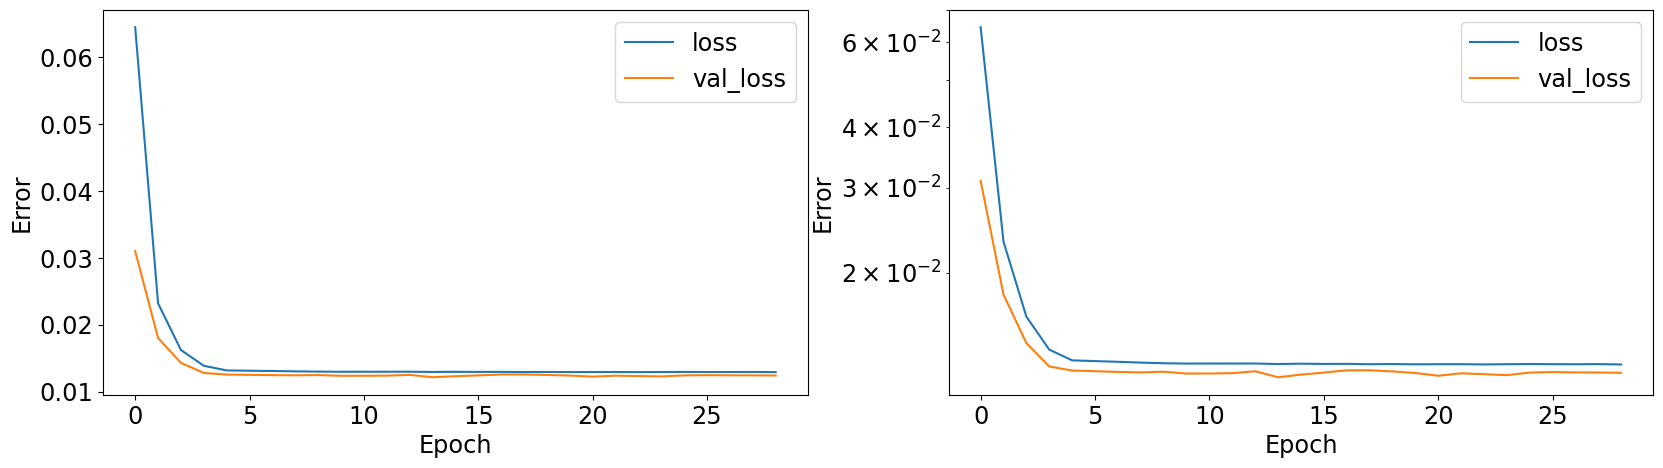

In [3]:
%%time
# model definition and training
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),
                                      tf.keras.layers.LSTM(1, activation='linear',
                                                                bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1))],
                                        name="wave_generator")
model.summary()


initial_learning_rate = 1E-3
nStepsPerEpoch = nBatches
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*100,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='mse', metrics=[])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       #start_from_epoch=15,   
                                                       patience=15, verbose=1)
callbacks = [early_stop_callback]

history = model.fit(dataset.skip(128),
                    validation_data=dataset.take(128),
                    callbacks=callbacks,
                    epochs=100, verbose=1)
model.evaluate(dataset)
plf.plotTrainHistory(history)
pass

### Control plots

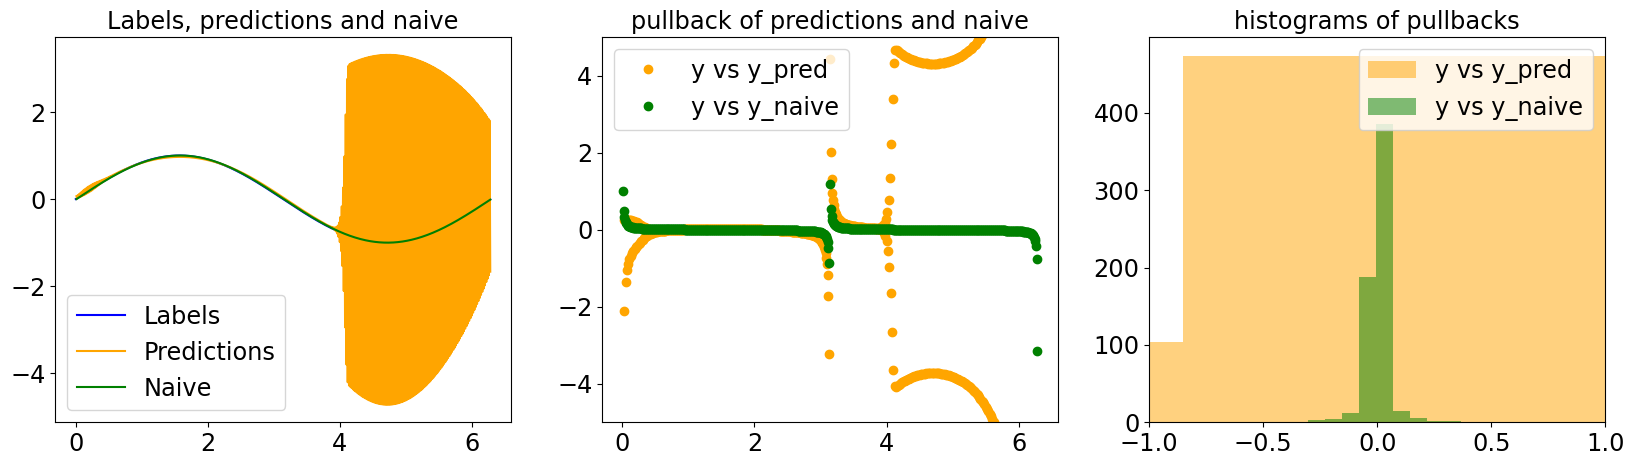

In [4]:
# control plots
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

# plot labels, predictions and naive on one plot
maxX = 2*np.pi
x = np.arange(0, maxX, 0.01)
y = np.sin(x)
y_pred = [model.predict(y[:index].reshape(1,-1,1), verbose=0)[0,0] for index in range(1,len(x))]
y_naive = np.roll(y, 1)

axis[0].plot(x, y, label="Labels", color="blue")
axis[0].plot(x[1:], y_pred, label="Predictions", color="orange")
axis[0].plot(x[1:], y_naive[1:], label="Naive", color="green")
axis[0].set_title("Labels, predictions and naive")
axis[0].legend()

# plot y/y_pred and y/y_naive on one plot

axis[1].plot(x[1:], (y[1:]-y_pred)/y[1:], 'o', label="y vs y_pred", color="orange")
axis[1].plot(x[1:], (y[1:]-y_naive[1:])/y[1:], 'o', label="y vs y_naive", color="green")
axis[1].set_ylim(-5, 5)
axis[1].set_title("pullback of predictions and naive")
axis[1].legend()

# plot histograms of pull

axis[2].hist((y[1:]-y_pred)/y[1:], bins=100, alpha=0.5, label="y vs y_pred", color="orange")
axis[2].hist((y[1:]-y_naive[1:])/y[1:], bins=100, alpha=0.5, label="y vs y_naive", color="green")
axis[2].set_xlim(-1, 1)
axis[2].set_title("histograms of pullbacks")
axis[2].legend()
plt.show()










pass

### The same for Simple RNN

In [5]:
# data generation
nBatches = 8192
batchSize = 1

def generateWave():
    minN = 10
    maxN = 100
    step = 0.01
    while True:
        length = np.random.randint(5*minN, maxN)
        offset = np.random.uniform(0, 2 * np.pi)
        x = np.linspace(0, offset + length*step, length)
        yield np.sin(x)
        
        
dataset = tf.data.Dataset.from_generator(generateWave, output_signature=tf.TensorSpec(shape=(None,), dtype=tf.float32))

dataset = dataset.map(lambda x: (x[:-3], x[-1]))

for item in dataset.take(5):
    print(colored("Features:","blue"), item[0].numpy(), end=" ")
    print(colored("Labels:","blue"), item[1].numpy())
    
dataset = dataset.batch(batchSize).take(nBatches).cache()

Features: [ 0.          0.05604657  0.11191694  0.1674355   0.22242767  0.2767206
  0.33014363  0.38252875  0.43371135  0.4835305   0.5318296   0.57845676
  0.6232654   0.66611475  0.70687     0.74540305  0.78159285  0.81532556
  0.8464951   0.8750035   0.90076125  0.9236872   0.94370943  0.9607649
  0.97480005  0.9857707   0.9936424   0.9983904   0.99999976  0.9984655
  0.9937923   0.98599494  0.9750979   0.9611355   0.9441516   0.9241995
  0.9013421   0.8756511   0.84720737  0.81610024  0.78242755  0.74629515
  0.70781666  0.667113    0.62431216  0.57954866  0.5329632   0.48470235
  0.4349177   0.38376582  0.3314075   0.2780073   0.22373317  0.16875568
  0.11324768  0.05738366  0.00133925 -0.05470938 -0.11058602 -0.166115
 -0.22112177 -0.27543342 -0.32887918 -0.38129103 -0.43250424 -0.48235777
 -0.53069496 -0.5773638  -0.62221754 -0.66511524 -0.70592207 -0.74450964
 -0.7807568  -0.8145494  -0.8457813  -0.8743544  -0.9001788  -0.92317325
 -0.9432656  -0.9603926  -0.9745004  -0.9855447

Epoch 1/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9939 - val_loss: 0.1128
Epoch 2/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0880 - val_loss: 0.0330
Epoch 3/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0291 - val_loss: 0.0197
Epoch 4/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0193 - val_loss: 0.0164
Epoch 5/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0164 - val_loss: 0.0148
Epoch 6/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 7/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 8/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 9/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 10/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 11/100
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 12

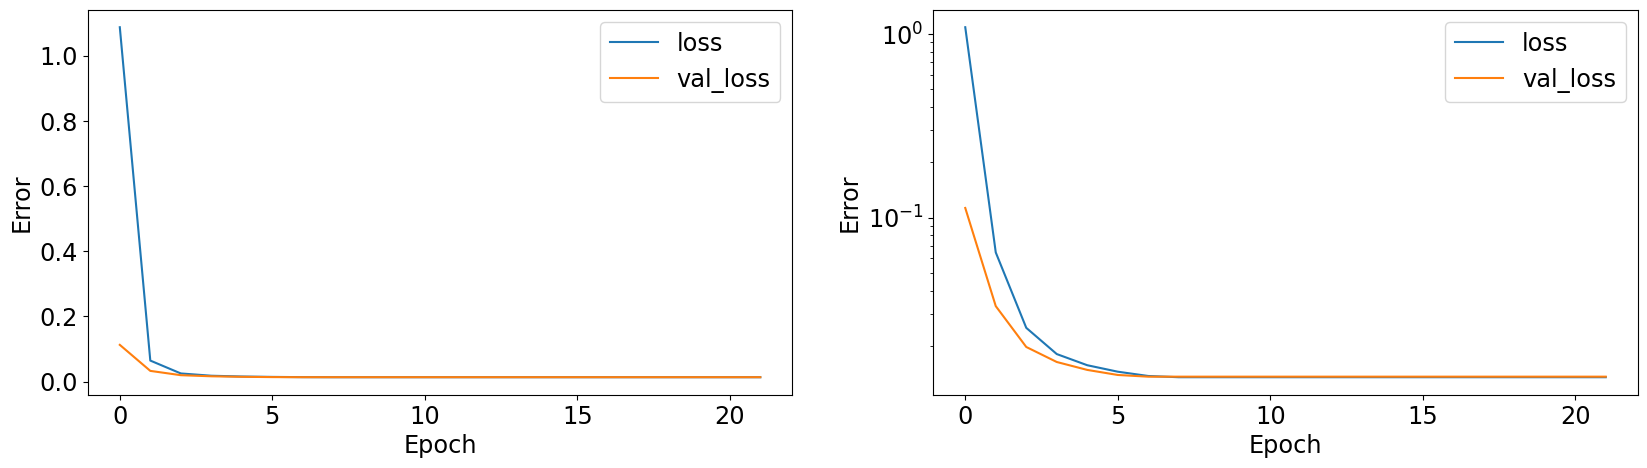

In [6]:
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),
    tf.keras.layers.SimpleRNN(1, activation='linear',  
                            bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1)
                            )],
                            name="wave_generator") 

initial_learning_rate = 1E-3
nStepsPerEpoch = nBatches
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*100,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='mse', metrics=[])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       #start_from_epoch=15,   
                                                       patience=15, verbose=1)
callbacks = [early_stop_callback]

history = model.fit(dataset.skip(128),
                    validation_data=dataset.take(128),
                    callbacks=callbacks,
                    epochs=100, verbose=1)
model.evaluate(dataset)
plf.plotTrainHistory(history)
pass

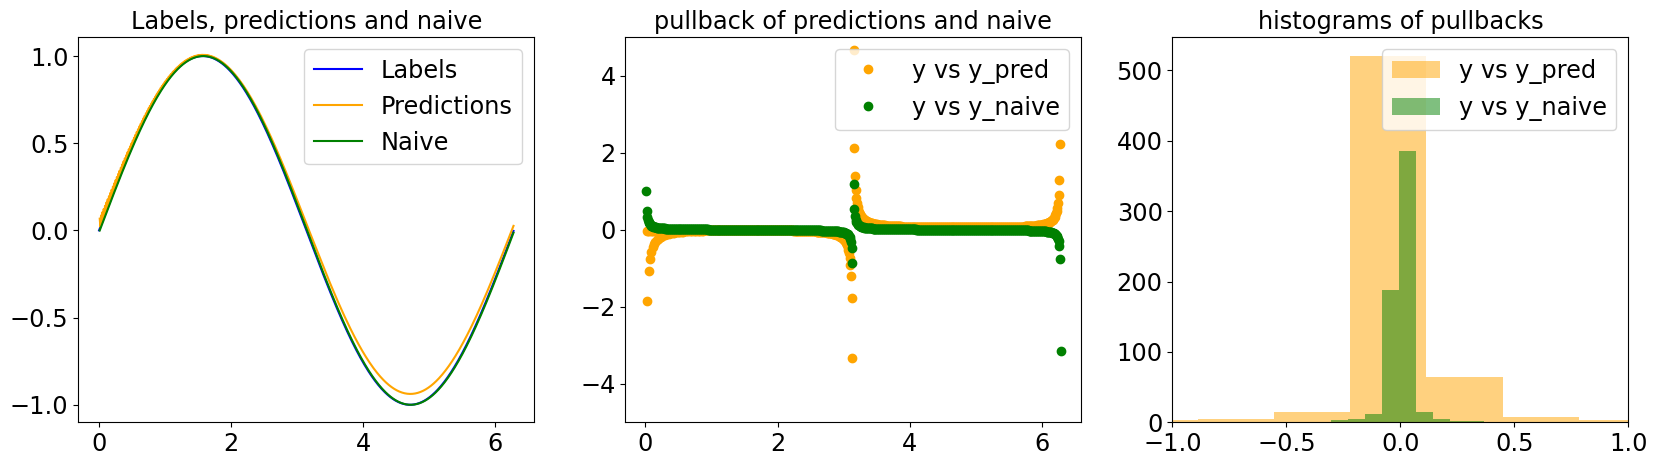

In [7]:
# control plots
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

# plot labels, predictions and naive on one plot
maxX = 2*np.pi
x = np.arange(0, maxX, 0.01)
y = np.sin(x)
y_pred = [model.predict(y[:index].reshape(1,-1,1), verbose=0)[0,0] for index in range(1,len(x))]
y_naive = np.roll(y, 1)

axis[0].plot(x, y, label="Labels", color="blue")
axis[0].plot(x[1:], y_pred, label="Predictions", color="orange")
axis[0].plot(x[1:], y_naive[1:], label="Naive", color="green")
axis[0].set_title("Labels, predictions and naive")
axis[0].legend()

# plot y/y_pred and y/y_naive on one plot

axis[1].plot(x[1:], (y[1:]-y_pred)/y[1:], 'o', label="y vs y_pred", color="orange")
axis[1].plot(x[1:], (y[1:]-y_naive[1:])/y[1:], 'o', label="y vs y_naive", color="green")
axis[1].set_ylim(-5, 5)
axis[1].set_title("pullback of predictions and naive")
axis[1].legend()

# plot histograms of pull

axis[2].hist((y[1:]-y_pred)/y[1:], bins=100, alpha=0.5, label="y vs y_pred", color="orange")
axis[2].hist((y[1:]-y_naive[1:])/y[1:], bins=100, alpha=0.5, label="y vs y_naive", color="green")
axis[2].set_xlim(-1, 1)
axis[2].set_title("histograms of pullbacks")
axis[2].legend()
plt.show()

